# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [38]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [39]:
df = pd.read_csv('data/wholesale.csv')

In [40]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [41]:
df.dtypes # Channel y Region son categóricos y habrá que convertirlos y agrupar.

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [42]:
# ¿Hay datos categóricos que convertir?
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [43]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [44]:
# ¿Hay que eliminar datos que faltan?
df.isnull().sum() # No hay datos nulos

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [45]:
# Colinealidad de columnas: ¿hay correlaciones altas?
numerical = df.drop(columns=['Channel', 'Region'])
numerical.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


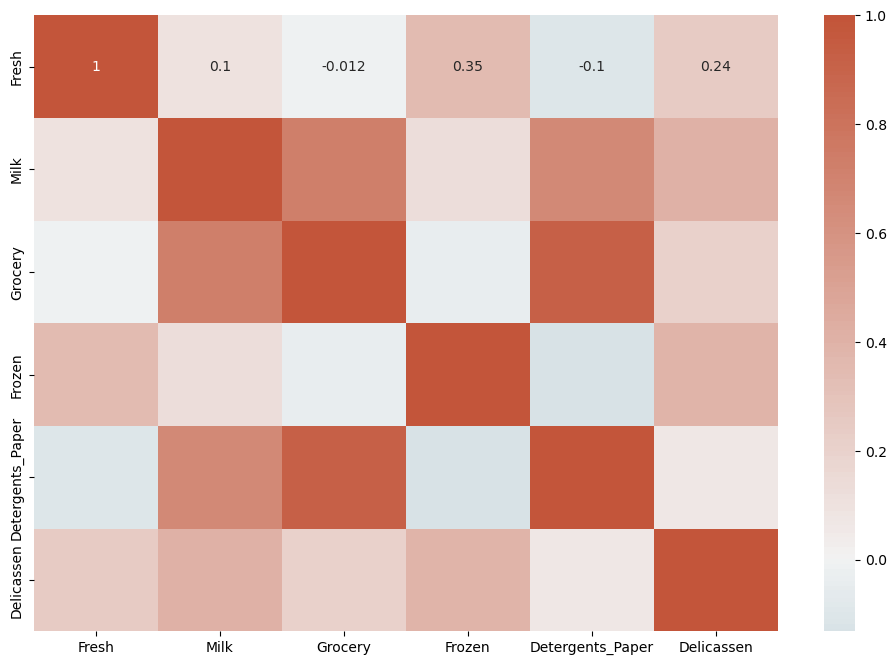

In [46]:
# Heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(numerical.corr(), annot=True,center=0, cmap=sns.diverging_palette(220, 20, n=200))
plt.show()

c:\Users\az14o\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\az14o\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\az14o\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\az14o\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

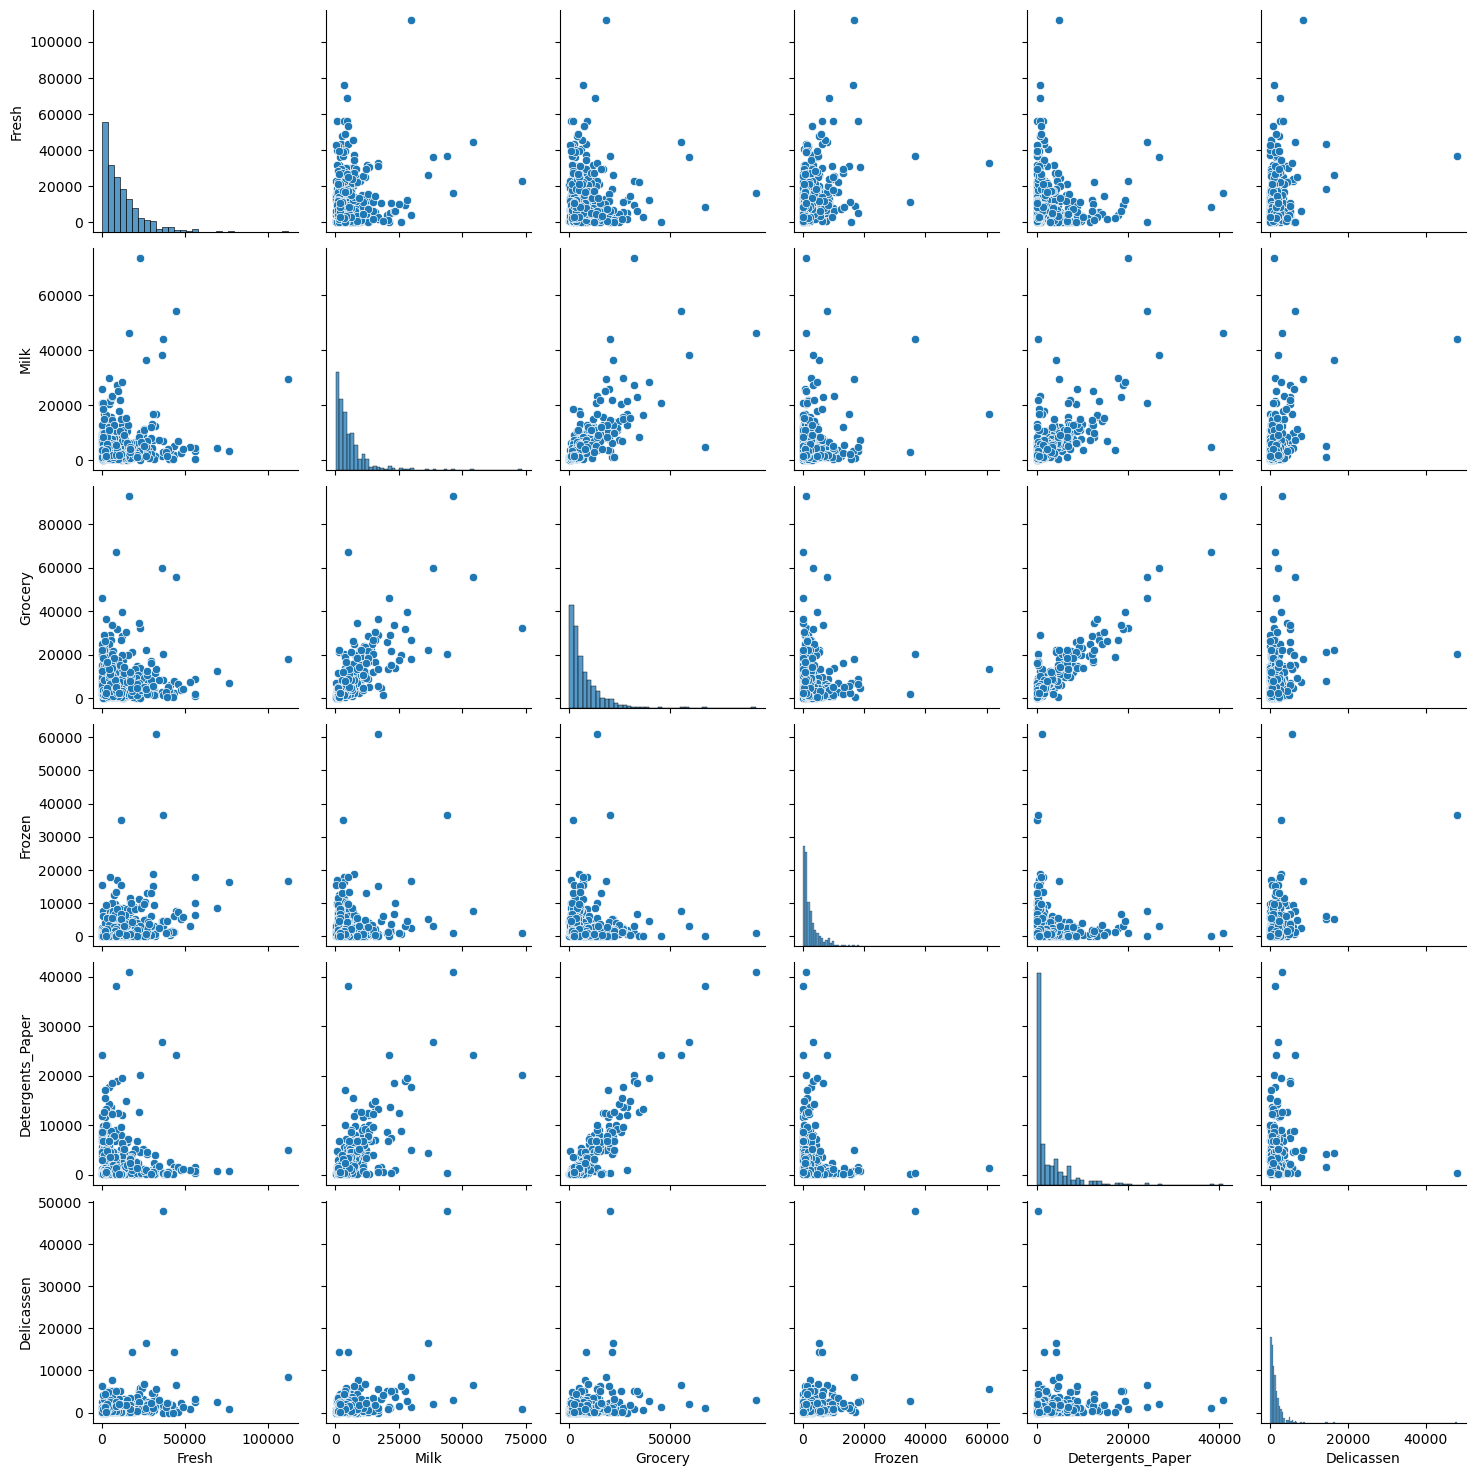

In [47]:
# Distribución de los datos por columnas: ¿está sesgada la distribución?
sns.pairplot(data = numerical.dropna())

**Tus observaciones aquí**

+ Frozen, Grocery, Milk y Detergents Paper tienen una gran correlación:
+ Detergents_paper/Grocery 0.92, Milk/Grocery 0,73, Detergents_Paper/Milk 0,66
+ Observamos la presencia de posibles outliers (en Delicatessen es más evidente) que alteran las muestras
+ Apreciamos sesgo positivo en todas ellas

# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [48]:
numerical.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


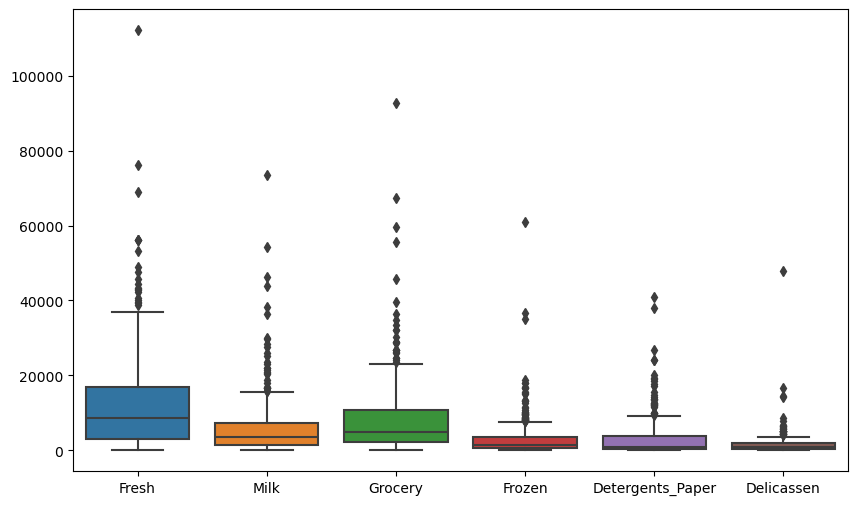

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data= numerical )
plt.show()

In [50]:
numerical.shape

(440, 6)

In [51]:
for columna in numerical.columns:
    # Calculate the percentiles
    seventy_fifth = numerical[columna].quantile(0.75)
    twenty_fifth = numerical[columna].quantile(0.25)
    
    # Obtain IQR
    iqr = seventy_fifth - twenty_fifth
    
    # Upper and lower thresholds
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)
    
    # Subset the dataset -> quedarnos con IQR
    numerical = numerical[(numerical[columna] >= lower) & (numerical[columna] <= upper)]

numerical.shape

(318, 6)

In [52]:
# # Calculate the percentiles
# seventy_fifth = numerical.quantile(0.75)
# twenty_fifth = numerical.quantile(0.25)

# # Obtain IQR
# iqr = seventy_fifth - twenty_fifth

# # Upper and lower thresholds
# upper = seventy_fifth + (1.5 * iqr)
# lower = twenty_fifth - (1.5 * iqr)

# # Subset the dataset
# outliers = taxis[(taxis['total'] < lower) | (taxis['total'] > upper)]
# outliers.head()

**Tus observaciones aquí**

+ Parece que hay una cantidad importante de outliers en todas las features
  

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [53]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here: Escalado por std y mean

scaler = StandardScaler()
df_standard = scaler.fit_transform(df)

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [57]:
from sklearn.cluster import KMeans

# Your code here:
# Método del codo para encontrar el número óptimo de clusters (suma errores cuadráticos = inertia)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standard)
    inertia.append(kmeans.inertia_)

c:\Users\az14o\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\az14o\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\az14o\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\az14o\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

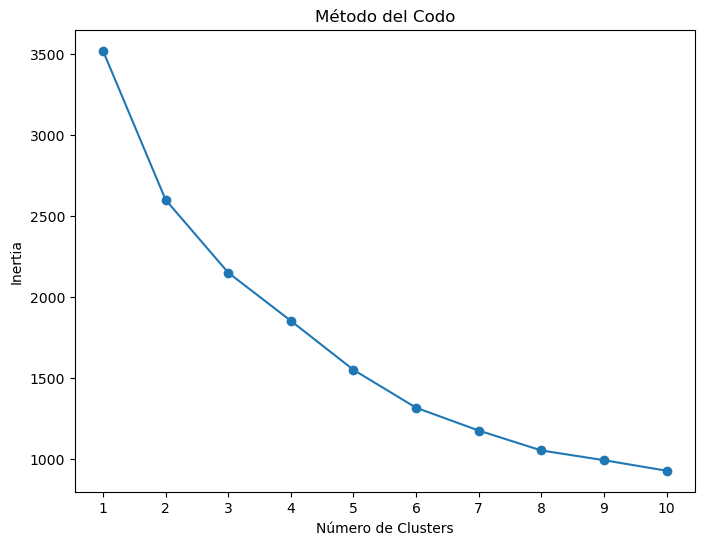

In [58]:
# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

### Viendo el elbow podríamos escoger 3 como el número de clusters correctos

In [64]:
kmeans_2 = KMeans(n_clusters=3).fit(df_standard)

labels = kmeans_2.predict(df_standard)

clusters = kmeans_2.labels_.tolist()
clusters

c:\Users\az14o\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\az14o\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,


In [66]:
df['Label'] = kmeans.labels_

Cuenta los valores en `labels`.

In [71]:
df['Label'].value_counts

<bound method IndexOpsMixin.value_counts of 0      8
1      8
2      8
3      3
4      8
      ..
435    0
436    6
437    2
438    3
439    3
Name: Label, Length: 440, dtype: int32>

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [72]:
from sklearn.cluster import DBSCAN 

# Inicializar modelo DBSCAN
dbscan = DBSCAN(eps=0.5)

# Ajustar a datos escalados
dbscan.fit(df_standard)

# Asignar etiquetas de los clústeres a una nueva columna en el df original
df['labels_DBSCAN'] = dbscan.labels_

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,8,-1
1,2,3,7057,9810,9568,1762,3293,1776,8,-1
2,2,3,6353,8808,7684,2405,3516,7844,8,-1
3,1,3,13265,1196,4221,6404,507,1788,3,1
4,2,3,22615,5410,7198,3915,1777,5185,8,-1


Cuenta los valores en `labels_DBSCAN`.

In [73]:
# Your code here
df['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [78]:
def plot(x,y,hue,titulo):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(titulo)
    return plt.show()

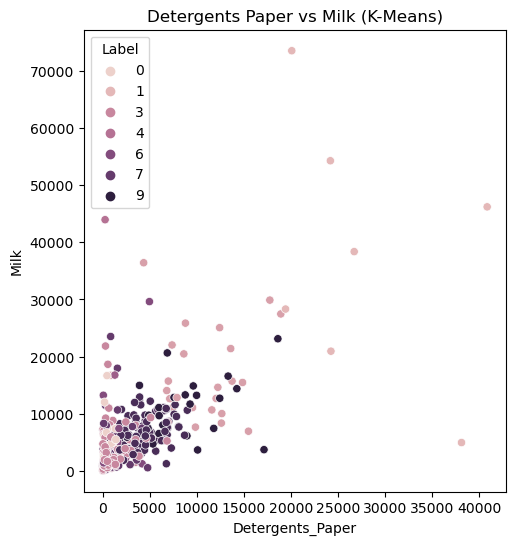

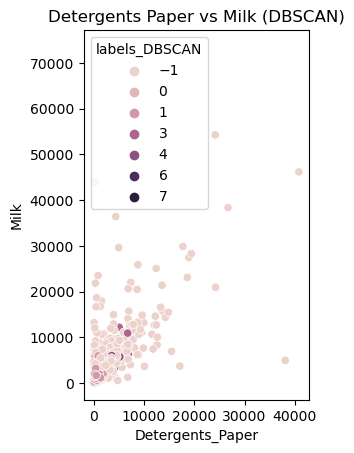

In [79]:
plt.figure(figsize=(12, 6))


# K-Means
plt.subplot(1, 2, 1)
plot(df['Detergents_Paper'], df['Milk'], df['Label'], 'Detergents Paper vs Milk (K-Means)')

# DBSCAN
plt.subplot(1, 2, 2)
plot(df['Detergents_Paper'], df['Milk'], df['labels_DBSCAN'], 'Detergents Paper vs Milk (DBSCAN)')




Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

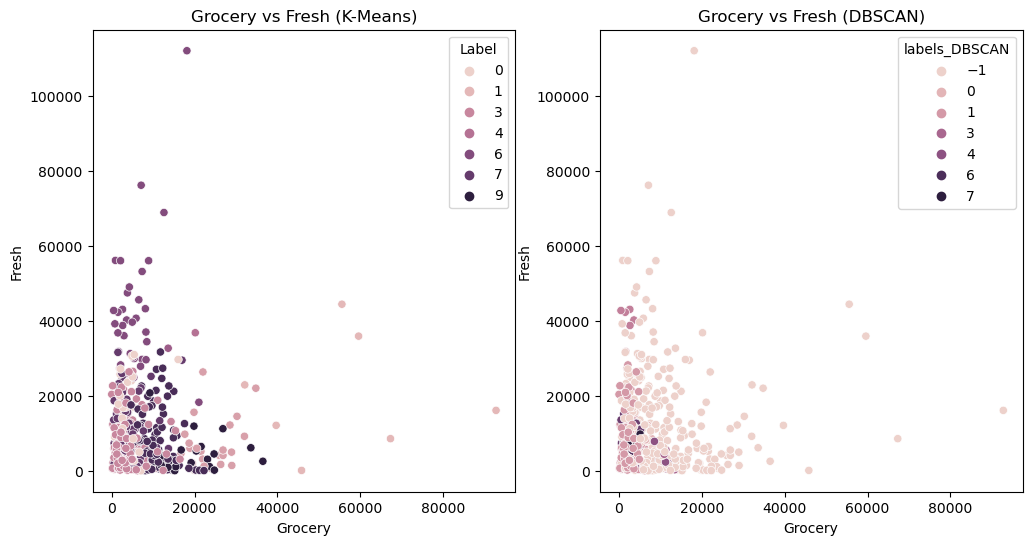

In [80]:
# Your code here:
plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Grocery'], y=df['Fresh'], hue=df['Label'])
plt.title('Grocery vs Fresh (K-Means)')

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Grocery'], y=df['Fresh'], hue=df['labels_DBSCAN'])
plt.title('Grocery vs Fresh (DBSCAN)')

plt.show()

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

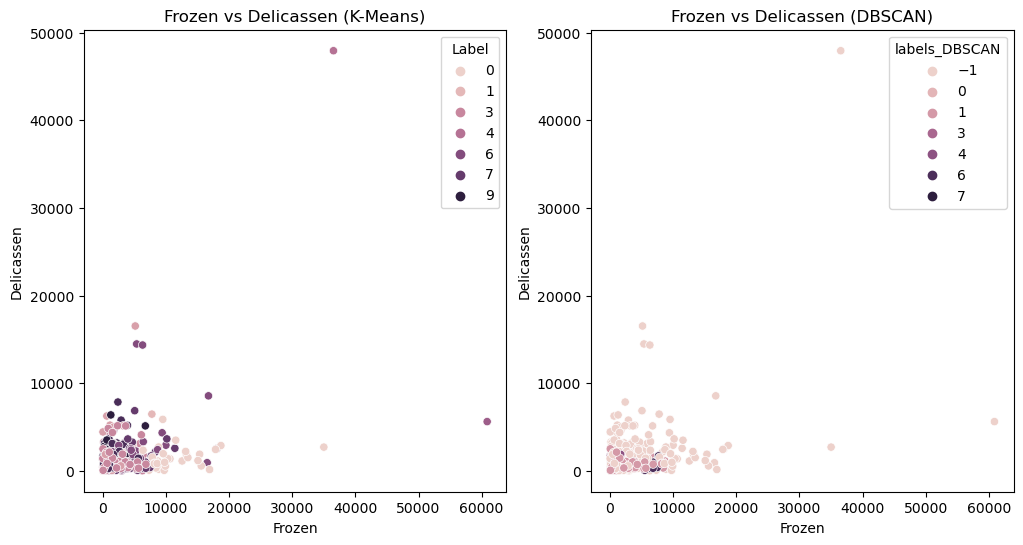

In [81]:
# Your code here:
plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Frozen'], y=df['Delicassen'], hue=df['Label'])
plt.title('Frozen vs Delicassen (K-Means)')

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Frozen'], y=df['Delicassen'], hue=df['labels_DBSCAN'])
plt.title('Frozen vs Delicassen (DBSCAN)')

plt.show()

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [83]:
# Your code here:
# Agrupar por 'Label' y calcular las medias
kmeans_grouped = df.groupby('Label').mean()
print("Medias agrupadas por KMeans:")
print(kmeans_grouped)

# Agrupar por 'labels_DBSCAN' y calcular las medias
dbscan_grouped = df.groupby('labels_DBSCAN').mean()
print("\n Medias agrupadas por DBSCAN:")
print(dbscan_grouped)

Medias agrupadas por KMeans:
        Channel    Region         Fresh          Milk       Grocery  \
Label                                                                 
0      1.031250  2.750000  15829.093750   3958.437500   3704.750000   
1      2.000000  2.571429  20031.285714  38084.000000  56126.142857   
2      2.000000  2.958333   7012.125000  16882.625000  23862.500000   
3      1.000000  3.000000   8338.012658   2904.841772   3486.594937   
4      1.000000  3.000000  36847.000000  43950.000000  20170.000000   
5      1.000000  2.000000  32717.000000  16784.000000  13626.000000   
6      1.060606  2.787879  42960.181818   4338.121212   5795.303030   
7      1.025641  1.269231  10456.602564   3287.064103   3983.282051   
8      2.000000  2.914634   9060.195122   6984.256098  10748.109756   
9      2.000000  1.375000   4245.125000  10831.625000  18602.625000   

             Frozen  Detergents_Paper    Delicassen  labels_DBSCAN  
Label                                            

¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
